In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
#Upload the relevant text files from local databasebasketball folder
from google.colab import files
uploaded = files.upload()

Saving coaches_career.txt to coaches_career.txt
Saving coaches_season.txt to coaches_season.txt
Saving draft.txt to draft.txt
Saving player_allstar.txt to player_allstar.txt
Saving player_playoffs.txt to player_playoffs.txt
Saving player_playoffs_career.txt to player_playoffs_career.txt
Saving player_regular_season.txt to player_regular_season.txt
Saving player_regular_season_career.txt to player_regular_season_career.txt
Saving players.txt to players.txt
Saving readme.txt to readme.txt
Saving team_season.txt to team_season.txt
Saving teams.txt to teams.txt


In [ ]:
#Load each file into a pandas DataFrame
team_season = pd.read_csv('team_season.txt', delimiter = ',')
coaches_season = pd.read_csv('coaches_season.txt', delimiter = ',')

In [ ]:
#view columns and check for any null values
team_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    1187 non-null   object 
 1   year    1187 non-null   int64  
 2   leag    1187 non-null   object 
 3   o_fgm   1187 non-null   int64  
 4   o_fga   1187 non-null   int64  
 5   o_ftm   1187 non-null   int64  
 6   o_fta   1187 non-null   int64  
 7   o_oreb  1187 non-null   int64  
 8   o_dreb  1187 non-null   int64  
 9   o_reb   1187 non-null   int64  
 10  o_asts  1187 non-null   int64  
 11  o_pf    1187 non-null   int64  
 12  o_stl   1187 non-null   int64  
 13  o_to    1187 non-null   int64  
 14  o_blk   1187 non-null   int64  
 15  o_3pm   1187 non-null   int64  
 16  o_3pa   1187 non-null   int64  
 17  o_pts   1187 non-null   int64  
 18  d_fgm   1187 non-null   int64  
 19  d_fga   1187 non-null   int64  
 20  d_ftm   1187 non-null   int64  
 21  d_fta   1187 non-null   int64  
 22  

In [ ]:
#view columns and check for any null values
coaches_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   coachid       1241 non-null   object
 1   year          1241 non-null   int64 
 2   yr_order      1241 non-null   int64 
 3   firstname     1241 non-null   object
 4   lastname      1241 non-null   object
 5   season_win    1241 non-null   int64 
 6   season_loss   1241 non-null   int64 
 7   playoff_win   1241 non-null   int64 
 8   playoff_loss  1241 non-null   int64 
 9   team          1241 non-null   object
dtypes: int64(6), object(4)
memory usage: 97.1+ KB


In [ ]:
#Create a new pandas DataFrame to store new features
new_team_season = pd.DataFrame()

#Store important features from old DataFrame (team_season) in new DataFrame (new_team_season)
new_team_season['team'] = team_season['team']
new_team_season['pace'] = team_season['pace']
new_team_season['year'] = team_season['year']
new_team_season['leag'] = team_season['leag']

#Compute new features based on team_season features and store in new_team_season

#Features based on Offensive Performance Metrics
#Offensive points scored per game
new_team_season['o_pts_per_game'] = team_season['o_pts']/(team_season['won'] + team_season['lost'])

#Field goal percentage = FG made/FG attempted
new_team_season['o_fg_perc'] = team_season['o_fgm']/team_season['o_fga']

#Free Throw percentage = FT made/FT attempted
new_team_season['o_ft_perc'] = team_season['o_ftm']/team_season['o_fta']

#Offensive Rebound Rate
new_team_season['o_reb_rate'] = team_season.apply(
    lambda row: row['o_oreb']/(row['o_oreb'] + row['o_dreb']) if row['o_oreb'] + row['o_dreb'] > 0 else 0, axis = 1) #condition is checked for each row of the table to prevent division by 0

#Offensive Turnover Rate
new_team_season['o_to_rate'] = team_season.apply(
    lambda row: row['o_to']/(row['o_fga'] + row['o_fta']) if row['o_fga'] + row['o_fta'] > 0 else 0, axis = 1) #condition is checked for each row of the table to prevent division by 0

#Percentage of Offensive 3-Point Shots
new_team_season['o_3p_perc'] = team_season.apply(
    lambda row: row['o_3pm']/(row['o_3pm'] + row['o_3pa']) if row['o_3pm'] + row['o_3pa'] > 0 else 0, axis = 1) #condition is checked for each row of the table to prevent division by 0


#Features based on Defensive Performance Metrics
#Defensive points allowed per game
new_team_season['d_pts_per_game'] = team_season['d_pts']/(team_season['won'] + team_season['lost'])

#Percentage of 3-Point Shots Allowed
new_team_season['d_3p_perc'] = team_season.apply(
    lambda row: row['d_3pm']/(row['d_3pa']) if row['d_3pa'] > 0 else 0, axis = 1) #condition is checked for each row of the table to prevent division by 0

#Defensive Field Goal Percentage
new_team_season['d_fg_perc'] = team_season.apply(
    lambda row: row['d_fgm']/row['d_fga'] if row['d_fga'] > 0 else 0, axis = 1) #condition is checked for each row of the table to prevent division by 0

#Steal Rate
new_team_season['d_steal_rate'] = team_season['d_stl']/(team_season['won'] + team_season['lost'])

#Block Rate (Opponents shots blocked throughout the season)
new_team_season['d_block_rate'] = team_season['d_blk']/(team_season['won'] + team_season['lost'])

#Features based on overall team performance
#Win and lose percentage
new_team_season['win_perc'] = team_season['won']/(team_season['won'] + team_season['lost'])
new_team_season['lose_perc'] = team_season['lost']/(team_season['won'] + team_season['lost'])

#Ratio of wins to losses
new_team_season['win_lose_ratio'] = team_season['won']/team_season['lost']

#Point differential per game (difference between offensive and defensive points)
new_team_season['pt_differential_per_game'] = team_season['o_pts'] - team_season['d_pts']

#Number of possessions = FGA - OREB + TO + 0.4*FTA
new_team_season['possessions'] = team_season['o_fga'] - team_season['o_oreb'] + team_season['o_to'] + 0.4*team_season['o_fta']

#Offensive and Defensive Points per 100 possessions
new_team_season['o_pts_per_poss'] = (new_team_season['o_pts_per_game']/new_team_season['possessions'])*100
new_team_season['d_pts_per_poss'] = (new_team_season['d_pts_per_game']/new_team_season['possessions'])*100

In [ ]:
#Split new_team_season into two DataFrames based on the league of each team
ABA_league_season = new_team_season[new_team_season['leag']=='A'].reset_index(drop=True)
NBA_league_season = new_team_season[new_team_season['leag']=='N'].reset_index(drop=True)

#merge the NBA_league_season DataFrame with coaches_season using the team and year columns
coach_team_df = NBA_league_season.merge(coaches_season, on = ['team', 'year'])

#Compute new features based on coaching statistics from coaches_season
#Win and lose percentage of coach
coach_team_df['coach_win_perc'] = coaches_season['season_win']/(coaches_season['season_win'] + coaches_season['season_loss'])
coach_team_df['coach_lose_perc'] = coaches_season['season_loss']/(coaches_season['season_win'] + coaches_season['season_loss'])

#Years of coaching experience
coach_team_df['coach_experience'] = coaches_season.groupby('coachid').cumcount() +1 #1 is added since cumcount starts from 0 (for a more intuitive result)

#Playoff participation (indicates whether a coach led their team to playoffs)
coach_team_df['coach_made_playoffs'] = ((coaches_season['playoff_win'] + coaches_season['playoff_loss']) > 0).astype(int)

#Playoff win percentage
coach_team_df['playoff_win_perc'] = coaches_season.apply(
    lambda row: row['playoff_win']/(row['playoff_win'] + row['playoff_loss']) if (row['playoff_win'] + row['playoff_loss']) > 0 else 0, axis = 1) #condition is checked for each row of the table to prevent division by 0

#Features from coaches_season are removed from the DataFrame (keeping only the new features)
coach_team_df.drop(columns=['firstname', 'lastname', 'yr_order', 'season_win', 'season_loss', 'playoff_win', 'playoff_loss'], inplace=True)

#Non-int values in leag column of both DataFrames are replaced by integer values (N and A replaced by 1 and 0)
coach_team_df['leag'] = coach_team_df['leag'].replace('N', 1)
ABA_league_season['leag'] = ABA_league_season['leag'].replace('A', 0)

<ipython-input-5-27942a865bee>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coach_team_df['leag'] = coach_team_df['leag'].replace('N', 1)
<ipython-input-5-27942a865bee>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ABA_league_season['leag'] = ABA_league_season['leag'].replace('A', 0)


In [ ]:
#Generate all possible team matchups within each year in the NBA league
matches = []
for year in coach_team_df['year'].unique():
  teams_in_year = coach_team_df[coach_team_df['year'] == year]
  team_combinations = list(combinations(teams_in_year['team'],2))

  for team_a, team_b in team_combinations:
    matches.append([year,team_a, team_b])

#convert to df
NBA_match_df = pd.DataFrame(matches, columns = ['year', 'team_a', 'team_b'])

#merge team stats for team_a with suffix "_a" (for NBA teams)
NBA_match_df = NBA_match_df.merge(
    coach_team_df.add_suffix('_a'), left_on=['year', 'team_a'], right_on=['year_a', 'team_a'],
    how='left'
)

# Drop redundant 'year_a' column after first merge
NBA_match_df = NBA_match_df.drop(columns=['year_a'])

# Merge team stats for team_b with suffix "_b"
NBA_match_df = NBA_match_df.merge(
    coach_team_df.add_suffix('_b'), left_on=['year', 'team_b'], right_on=['year_b', 'team_b'],
    how='left'
)

# Drop redundant 'year_b' column after second merge
NBA_match_df = NBA_match_df.drop(columns=['year_b'])

#Add merger indicator (0 if game occurred pre-merger (before 1976) and 1 for post-merger(after 1976))
NBA_match_df['merger_indicator'] = NBA_match_df['year'].apply(lambda x: 1 if x >= 1976 else 0)

#determine the winner based on number of offensive points per game (Assign 1 if team A points > team B points else 0)
NBA_match_df['winner'] = NBA_match_df.apply(lambda x: 1 if x['o_pts_per_game_a'] > x['o_pts_per_game_b'] else 0, axis = 1)

In [ ]:
#Generate all possible team matchups within each year in the ABA league
matches = []
for year in ABA_league_season['year'].unique():
  teams_in_year = ABA_league_season[ABA_league_season['year'] == year]
  team_combinations = list(combinations(teams_in_year['team'],2))

  for team_a, team_b in team_combinations:
    matches.append([year,team_a, team_b])

#convert to df
ABA_match_df = pd.DataFrame(matches, columns = ['year', 'team_a', 'team_b'])

#merge team stats for team_a with suffix "_a" (for NBA teams)
ABA_match_df = ABA_match_df.merge(
    ABA_league_season.add_suffix('_a'), left_on=['year', 'team_a'], right_on=['year_a', 'team_a'],
    how='left'
)

# Drop redundant 'year_a' column after first merge
ABA_match_df = ABA_match_df.drop(columns=['year_a'])

# Merge team stats for team_b with suffix "_b"
ABA_match_df = ABA_match_df.merge(
    ABA_league_season.add_suffix('_b'), left_on=['year', 'team_b'], right_on=['year_b', 'team_b'],
    how='left'
)

#Drop redundant 'year_b' column after second merge
ABA_match_df = ABA_match_df.drop(columns=['year_b'])

#Add merger indicator (0 if game occurred pre-merger (before 1976) and 1 for post-merger(after 1976))
ABA_match_df['merger_indicator'] = ABA_match_df['year'].apply(lambda x: 1 if x >= 1976 else 0)

#creating placeholder columns filled with NaN values (for coaching statistics)
ABA_match_df['coach_win_perc_a'] = float('nan')
ABA_match_df['coach_experience_a'] = float('nan')
ABA_match_df['coach_lose_perc_a'] = float('nan')
ABA_match_df['coach_made_playoffs_a'] = float('nan')
ABA_match_df['playoff_win_perc_a'] = float('nan')

ABA_match_df['coach_win_perc_b'] = float('nan')
ABA_match_df['coach_experience_b'] = float('nan')
ABA_match_df['coach_lose_perc_b'] = float('nan')
ABA_match_df['coach_made_playoffs_b'] = float('nan')
ABA_match_df['playoff_win_perc_b'] = float('nan')

#determine the winner based on number of offensive points per game (Assign 1 if team A points > team B points else 0)
ABA_match_df['winner'] = ABA_match_df.apply(lambda x: 1 if x['o_pts_per_game_a'] > x['o_pts_per_game_b'] else 0, axis = 1)

In [ ]:
#Concatenate ABA_match_df with NBA_match_df
merged_df = pd.concat([ABA_match_df, NBA_match_df], ignore_index = True)

#Impute missing coaching data for the teams in the ABA league (using mean imputation)
imputer = SimpleImputer(strategy='mean')
merged_df[['coach_win_perc_a', 'coach_experience_a', 'coach_lose_perc_a', 'coach_made_playoffs_a', 'playoff_win_perc_a', 'coach_win_perc_b', 'coach_experience_b', 'coach_lose_perc_b', 'coach_made_playoffs_b', 'playoff_win_perc_b']] = imputer.fit_transform(
    merged_df[['coach_win_perc_a', 'coach_experience_a', 'coach_lose_perc_a', 'coach_made_playoffs_a', 'playoff_win_perc_a', 'coach_win_perc_b', 'coach_experience_b', 'coach_lose_perc_b', 'coach_made_playoffs_b', 'playoff_win_perc_b']]
)

##**Exploratory Data Analysis**

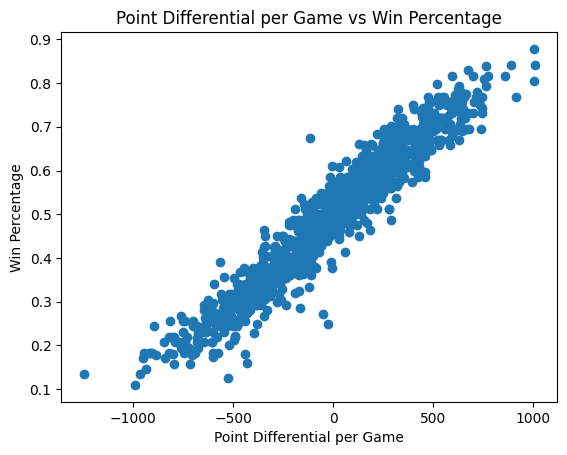

In [ ]:
#Plot a scatter plot of the points differential per game vs the win percentage of each team
plt.scatter(new_team_season['pt_differential_per_game'], new_team_season['win_perc'])

#Add figure and axes labels
plt.title('Point Differential per Game vs Win Percentage')
plt.xlabel('Point Differential per Game')
plt.ylabel('Win Percentage')

#Show the plot
plt.show()

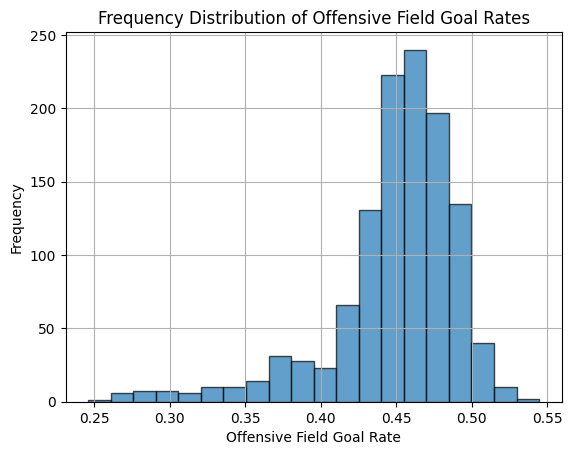

In [ ]:
#Plot a histogram showing the frequency distribution of offensive field goal rates
new_team_season['o_fg_perc'].hist(bins=20, edgecolor='black', alpha=0.7)

#Add figure and axes labels
plt.title('Frequency Distribution of Offensive Field Goal Rates')
plt.xlabel('Offensive Field Goal Rate')
plt.ylabel('Frequency')

#Show the plot
plt.show()

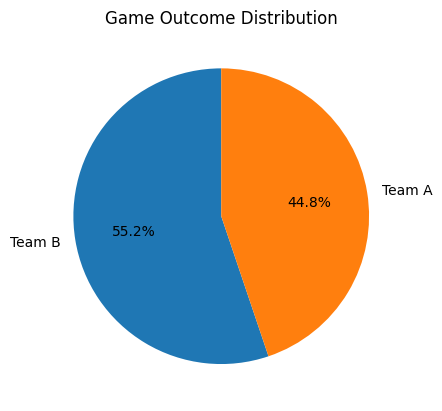

In [ ]:
#Count the number of times that Team A won and that Team B won
outcome_counts = merged_df['winner'].value_counts() #1 indicates Team A won and 0 indicates Team B won
labels = ['Team B', 'Team A'] #labels for pie chart

#Plot a pie chart showing the distribution for each label
outcome_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', startangle=90)

#Add figure and axes labels
plt.title('Game Outcome Distribution')
plt.ylabel('')

#Show the plot
plt.show()

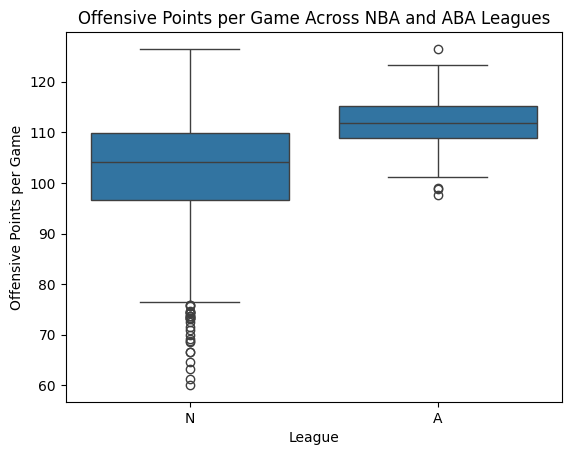

In [ ]:
#Plot box plots comparing the distributions for the offensive points scored per game for teams in each league
sns.boxplot(x='leag', y='o_pts_per_game', data=new_team_season)

#Add figure and axes labels
plt.xlabel('League')
plt.ylabel('Offensive Points per Game')
plt.title('Offensive Points per Game Across NBA and ABA Leagues')

#Show the plot
plt.show()

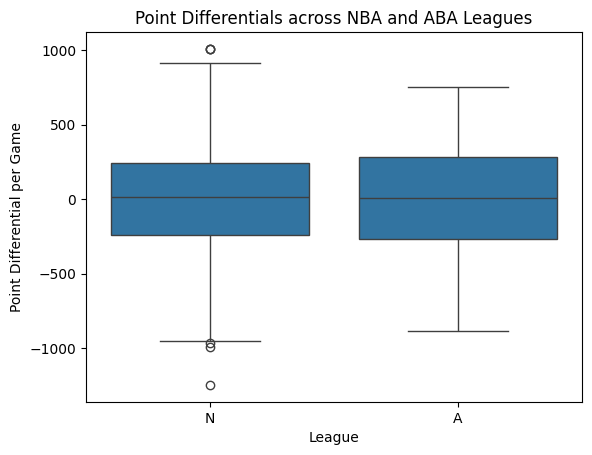

In [ ]:
#Plot box plots comparing the distributions for the point differential per game for teams in each league
sns.boxplot(x='leag', y='pt_differential_per_game', data=new_team_season)

#Add figure and axes labels
plt.xlabel('League')
plt.ylabel('Point Differential per Game')
plt.title('Point Differentials across NBA and ABA Leagues')

#Show the plot
plt.show()

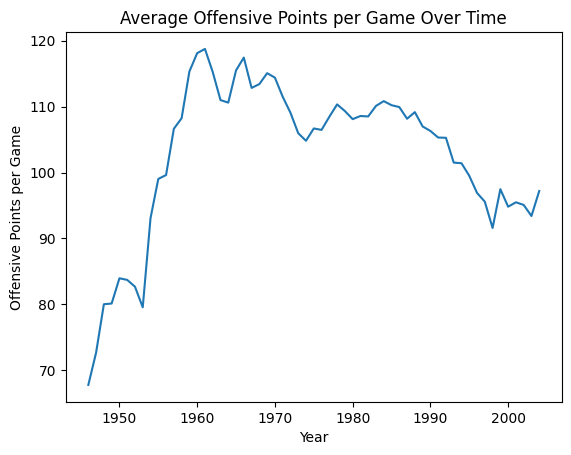

In [ ]:
#Plot a line graph of the average offensive points scored over time
new_team_season.groupby('year')['o_pts_per_game'].mean().plot(kind='line')

#Add figure and axes labels
plt.title('Average Offensive Points per Game Over Time')
plt.xlabel('Year')
plt.ylabel('Offensive Points per Game')

#Show the plot
plt.show()

##**Obtain Feature Importance Scores**

In [ ]:
def get_feature_impt(X,y):
  """Function that scales the data and then extracts and returns the feature
  importance scores of each feature (as a DataFrame) using the Random Forest Classifier"""

  # Split the data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  #Initialise the scaler
  scaler = StandardScaler()

  #Fit the scaler on the training set and transform it
  X_train_scaled = scaler.fit_transform(X_train)

  #Transform the test set using the same scaler
  X_test_scaled = scaler.transform(X_test)

  #Fitting the data using the Random Forest Classifier
  model = RandomForestClassifier(random_state=42)
  model.fit(X_train_scaled, y_train)

  #Extract feature importances
  importances = model.feature_importances_

  # Create a DataFrame to display feature importances
  feature_importance_df = pd.DataFrame({'Feature': pd.DataFrame(X_train_scaled).columns, 'Importance': importances})
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
  return feature_importance_df

def plot_feature_impt(feature_importance_df):
  """Function that plots each feature (represented by its index in the DataFrame)
  with its corresponding feature importance score
  """
  # Plot the feature importances
  plt.figure(figsize=(12, 6))

  #Plot a horizontal bar graph of feature vs importance score
  plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

  #Plot a (vertical) red dashed line to mark the Threshold value
  plt.axvline(x=0.001, color='red', linestyle='--', label='Cutoff Threshold (0.001)')

  #Add figure and axes labels
  plt.xlabel('Importance')
  plt.ylabel('Feature Index')
  plt.title('Feature Importances from Random Forest')

  #Invert the y axis to display the feature indices in ascending order (from the top of the axis downwards)
  plt.gca().invert_yaxis()

  #Show the legend and the plot
  plt.legend()
  plt.show()

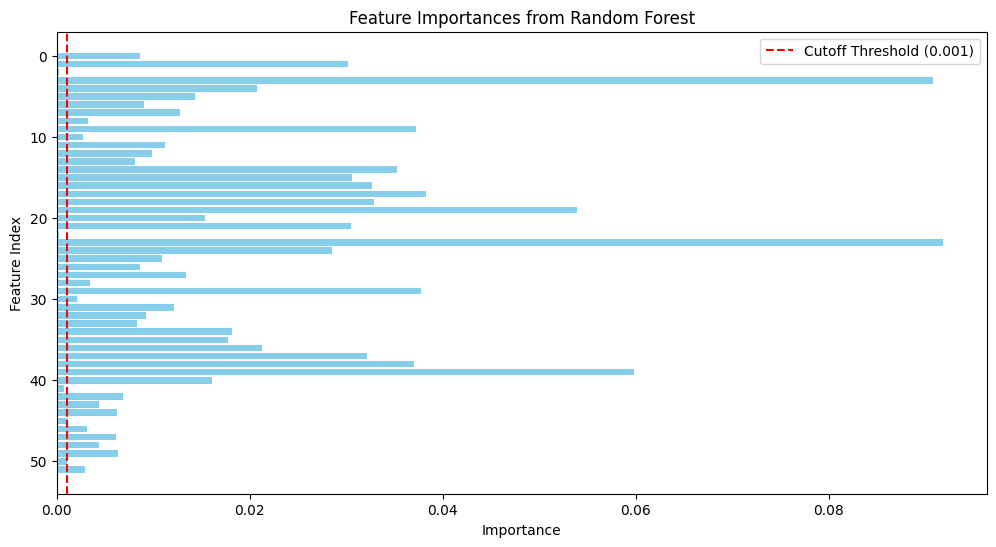

In [ ]:
#Store all numerical features in X and the target variable in y
X = merged_df.drop(columns=['team_a', 'team_b', 'coachid_a', 'coachid_b', 'winner'])
y = merged_df['winner']

#Extract the feature importance scores of these scaled features and plot the results
feature_importance_df = get_feature_impt(X,y)
plot_feature_impt(feature_importance_df)

# Drop features with importance below threshold = 0.001
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < 0.001]['Feature']
X = X.drop(X.columns[low_importance_features], axis=1)

# Split the data into train and test sets based on the remaining features in X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialise the scaler
scaler = StandardScaler()

#Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

##**Model Training**

In [ ]:
from sklearn.model_selection import KFold # K fold cross validation
from sklearn.naive_bayes import GaussianNB #Gaussian Naïve Bayes
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import StackingClassifier  # StackingClassifier in scikit-learn
from sklearn.decomposition import PCA #Principle Component Analysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # for performance metrics

In [ ]:
#5 fold cross validation for Logistic Regression Model (not included in report)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy = []
X= np.concatenate((X_train_scaled, X_test_scaled))
y= np.concatenate((y_train, y_test))

#apply Principle Component Analysis
pca = PCA(12)
X = pca.fit_transform(X)

# Loop through each fold
fold = 0
for train_index, test_index in kf.split(X,y):
    fold=fold+1
    #creating data split for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    print("This is fold number:", fold)

    model = LogisticRegression() #creating an instance for the model
    model.fit(X_train, Y_train) #training the model

    # Predict labels for test set and evaluate model performance
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred) #calculating the accuracy of model for this fold
    print('Accuracy for this fold is:', acc) #displaying accuracy
    print('Confusion Matrix for this fold is:\n', confusion_matrix(Y_test, y_pred))#computing confusion matrix for models expected and predicted classifications
    print('Classification Report for this fold is:\n', classification_report(Y_test, y_pred)) #displaying classification report of model for this fold

    accuracy.append(acc)

#computing mean accuracy and the standard deviation of the average accuracy across the five folds
mean = np.mean(accuracy)
std_dev = np.std(accuracy, ddof=1)

print("accuracy: ", mean, "+/-", std_dev)

This is fold number: 1
Accuracy for this fold is: 0.7233266459967171
Confusion Matrix for this fold is:
 [[2337  661]
 [ 856 1629]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      2998
           1       0.71      0.66      0.68      2485

    accuracy                           0.72      5483
   macro avg       0.72      0.72      0.72      5483
weighted avg       0.72      0.72      0.72      5483

This is fold number: 2
Accuracy for this fold is: 0.7249680831661499
Confusion Matrix for this fold is:
 [[2377  645]
 [ 863 1598]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      3022
           1       0.71      0.65      0.68      2461

    accuracy                           0.72      5483
   macro avg       0.72      0.72      0.72      5483
weighted avg       0.72      0.72      0.72      5483



In [ ]:
#5 fold cross validation for RandomForestClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy = []

X= np.concatenate((X_train_scaled, X_test_scaled))
y= np.concatenate((y_train, y_test))

#apply Principle Component Analysis
pca = PCA(12)
X = pca.fit_transform(X)

# Loop through each fold
fold = 0
for train_index, test_index in kf.split(X,y):
    fold=fold+1
    #creating data split for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    print("This is fold number:", fold)

    model = RandomForestClassifier(n_estimators=200,random_state=42) #creating an instance for the model
    model.fit(X_train, Y_train) #training the model

    # Predict labels for test set and evaluate the model performance
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)#calculating the accuracy of model for this fold
    print('Accuracy for this fold is:', acc)#displaying accuracy
    print('Confusion Matrix for this fold is:\n', confusion_matrix(Y_test, y_pred))#computing confusion matrix for models expected and predicted classifications
    print('Classification Report for this fold is:\n', classification_report(Y_test, y_pred))#displaying classification report of model for this fold

    accuracy.append(acc)

#computing mean accuracy and the standard deviation of the average accuracy across the five folds
mean = np.mean(accuracy)
std_dev = np.std(accuracy, ddof=1)

print("accuracy: ", mean, "+/-", std_dev)

This is fold number: 1
Accuracy for this fold is: 0.9150100310049243
Confusion Matrix for this fold is:
 [[2763  235]
 [ 231 2254]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2998
           1       0.91      0.91      0.91      2485

    accuracy                           0.92      5483
   macro avg       0.91      0.91      0.91      5483
weighted avg       0.92      0.92      0.92      5483

This is fold number: 2
Accuracy for this fold is: 0.9066204632500456
Confusion Matrix for this fold is:
 [[2792  230]
 [ 282 2179]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      3022
           1       0.90      0.89      0.89      2461

    accuracy                           0.91      5483
   macro avg       0.91      0.90      0.91      5483
weighted avg       0.91      0.91      0.91      5483



In [ ]:
#5 fold cross validation for Gaussian Naïve Bayes Classifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy = []
X= np.concatenate((X_train_scaled, X_test_scaled))
y= np.concatenate((y_train, y_test))

#apply Principle Component Analysis
pca = PCA(12)
X = pca.fit_transform(X)

# Loop through each fold
fold = 0
for train_index, test_index in kf.split(X,y):
    fold=fold+1
    #creating data split for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    print("This is fold number:", fold)

    model = GaussianNB() #creating an instance for the model
    model.fit(X_train, Y_train) #training the model

    # Predict labels for test set and evaluate the model performance
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)#calculating the accuracy of model for this fold
    print('Accuracy for this fold is:', acc) #displaying accuracy
    print('Confusion Matrix for this fold is:\n', confusion_matrix(Y_test, y_pred))#computing confusion matrix for models expected and predicted classifications
    print('Classification Report for this fold is:\n', classification_report(Y_test, y_pred))#displaying classification report of model for this fold

    accuracy.append(acc)

#computing mean accuracy and the standard deviation of the average accuracy across the five folds
mean = np.mean(accuracy)
std_dev = np.std(accuracy, ddof=1)

print("accuracy: ", mean, "+/-", std_dev)

This is fold number: 1
Accuracy for this fold is: 0.7096480029181105
Confusion Matrix for this fold is:
 [[2464  534]
 [1058 1427]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76      2998
           1       0.73      0.57      0.64      2485

    accuracy                           0.71      5483
   macro avg       0.71      0.70      0.70      5483
weighted avg       0.71      0.71      0.70      5483

This is fold number: 2
Accuracy for this fold is: 0.7162137515958417
Confusion Matrix for this fold is:
 [[2427  595]
 [ 961 1500]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      3022
           1       0.72      0.61      0.66      2461

    accuracy                           0.72      5483
   macro avg       0.72      0.71      0.71      5483
weighted avg       0.72      0.72      0.71      5483



In [ ]:
#5 fold cross validation for GradientBoostingClassifier (not included in report)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy = []
X= np.concatenate((X_train_scaled, X_test_scaled))
y= np.concatenate((y_train, y_test))

#apply Principle Component Analysis
pca = PCA(12)
X = pca.fit_transform(X)

# Loop through each fold
fold = 0
for train_index, test_index in kf.split(X,y):
    fold=fold+1
    #creating data split for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    print("This is fold number:", fold)

    model = GradientBoostingClassifier() #creating an instance for the model
    model.fit(X_train, Y_train) #training the model

    # Predict labels for test set and evaluate model performance
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred) #calculating the accuracy of model for this fold
    print('Accuracy for this fold is:', acc) #displaying accuracy
    print('Confusion Matrix for this fold is:\n', confusion_matrix(Y_test, y_pred))#computing confusion matrix for models expected and predicted classifications
    print('Classification Report for this fold is:\n', classification_report(Y_test, y_pred))#displaying classification report of model for this fold

    accuracy.append(acc)

#computing mean accuracy and the standard deviation of the average accuracy across the five folds
mean = np.mean(accuracy)
std_dev = np.std(accuracy, ddof=1)

print("accuracy: ", mean, "+/-", std_dev)

This is fold number: 1
Accuracy for this fold is: 0.7623563742476747
Confusion Matrix for this fold is:
 [[2386  612]
 [ 691 1794]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      2998
           1       0.75      0.72      0.73      2485

    accuracy                           0.76      5483
   macro avg       0.76      0.76      0.76      5483
weighted avg       0.76      0.76      0.76      5483

This is fold number: 2
Accuracy for this fold is: 0.7587087360933795
Confusion Matrix for this fold is:
 [[2458  564]
 [ 759 1702]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79      3022
           1       0.75      0.69      0.72      2461

    accuracy                           0.76      5483
   macro avg       0.76      0.75      0.75      5483
weighted avg       0.76      0.76      0.76      5483



In [ ]:
#5 fold cross validation for SVMs with three different kernel functions

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_1 = []
accuracy_2 = []
accuracy_3 = []
X= np.concatenate((X_train_scaled, X_test_scaled))
y= np.concatenate((y_train, y_test))

#apply Principle Component Analysis
pca = PCA(12)
X = pca.fit_transform(X)

# Loop through each fold
fold = 0
for train_index, test_index in kf.split(X,y):
    fold=fold+1
    #creating data split for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    print("This is fold number:", fold)

    #three models are initialised for SVM, using a different kernel each time
    model_1 = SVC(kernel='linear', random_state=42)  #creating an instance for the SVM with a linear kernel
    model_2 = SVC(kernel='poly', random_state=42)  #creating an instance for the SVM with a polynomial kernel
    model_3 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) #creating an instance for the SVM with an rbf kernel
    model_1.fit(X_train, Y_train) #training the model
    model_2.fit(X_train, Y_train) #training the model
    model_3.fit(X_train, Y_train) #training the model

    # Predict labels for test set and evaluate performance for each of the three models
    y_pred_1 = model_1.predict(X_test)
    y_pred_2 = model_2.predict(X_test)
    y_pred_3 = model_3.predict(X_test)

    #calculating the accuracy of each model for this fold
    acc_1 = accuracy_score(Y_test, y_pred_1)
    acc_2 = accuracy_score(Y_test, y_pred_2)
    acc_3 = accuracy_score(Y_test, y_pred_3)

    #displaying accuracies
    print('Accuracy for the linear kernel function is:', acc_1)
    print('Accuracy for the polynomial kernel function is:', acc_2)
    print('Accuracy for the rbf kernel function is:', acc_3)

    #computing confusion matrix for each model's expected and predicted classifications
    print('Confusion Matrix for the linear kernel function is:\n', confusion_matrix(Y_test, y_pred_1))
    print('Confusion Matrix for the polynomial kernel function is:\n', confusion_matrix(Y_test, y_pred_2))
    print('Confusion Matrix for the rbf kernel function is:\n', confusion_matrix(Y_test, y_pred_3))

    #displaying classification report of each model for this fold
    print('Classification Report for the linear kernel function is:\n', classification_report(Y_test, y_pred_1))
    print('Classification Report for the polynomial kernel function is:\n', classification_report(Y_test, y_pred_2))
    print('Classification Report for the rbf kernel function is:\n', classification_report(Y_test, y_pred_3))

    accuracy_1.append(acc_1)
    accuracy_2.append(acc_2)
    accuracy_3.append(acc_3)

#computing mean accuracy and the standard deviation of the average accuracy for each model across the five folds
mean_1 = np.mean(accuracy_1)
std_dev_1 = np.std(accuracy_1, ddof=1)
mean_2 = np.mean(accuracy_2)
std_dev_2 = np.std(accuracy_2, ddof=1)
mean_3 = np.mean(accuracy_3)
std_dev_3 = np.std(accuracy_3, ddof=1)

print("accuracy for linear kernel: ", mean_1, "+/-", std_dev_1)
print("accuracy for polynomial kernel: ", mean_2, "+/-", std_dev_2)
print("accuracy for rbf kernel: ", mean_3, "+/-", std_dev_3)

This is fold number: 1
Accuracy for the linear kernel function is: 0.7260623746124385
Accuracy for the polynomial kernel function is: 0.7490424949844975
Accuracy for the rbf kernel function is: 0.7745759620645633
Confusion Matrix for the linear kernel function is:
 [[2357  641]
 [ 861 1624]]
Confusion Matrix for the polynomial kernel function is:
 [[2490  508]
 [ 868 1617]]
Confusion Matrix for the rbf kernel function is:
 [[2468  530]
 [ 706 1779]]
Classification Report for the linear kernel function is:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      2998
           1       0.72      0.65      0.68      2485

    accuracy                           0.73      5483
   macro avg       0.72      0.72      0.72      5483
weighted avg       0.73      0.73      0.72      5483

Classification Report for the polynomial kernel function is:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78 

In [ ]:
#5fold cross validation for Stacking base learners: Decision Tree Classifier and a KNN model
#and using a Gaussian Naive Bayes Classifier as the meta-learner

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy = []
X= np.concatenate((X_train_scaled, X_test_scaled))
y= np.concatenate((y_train, y_test))

#apply Principle Component Analysis
pca = PCA(12)
X = pca.fit_transform(X)


# Loop through each fold
fold = 0
for train_index, test_index in kf.split(X,y):
    fold=fold+1
    #creating data split for this fold
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    print("This is fold number:", fold)
    # Define instances for the base models (Decision Tree and K-Nearest Neighbour)
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()

    # Define an instance for the meta-model (Gaussian Naïve Bayes)
    meta_model = GaussianNB()

    # Define the StackingClassifier with base models and the meta-model
    model = StackingClassifier(
        estimators=[('dt', dt), ('knn', knn)],
        final_estimator=meta_model,
        cv=5  # Cross-validation for base model training
    )

    model.fit(X_train, Y_train) #training the model


    # Predict labels for test set and evaluate the model performance
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred) #calculating the accuracy of model for this fold
    print('Accuracy for this fold is:', acc) #displaying accuracy
    print('Confusion Matrix for this fold is:\n', confusion_matrix(Y_test, y_pred)) #computing confusion matrix for models expected and predicted classifications
    print('Classification Report for this fold is:\n', classification_report(Y_test, y_pred)) #displaying classification report of model for this fold

    accuracy.append(acc)

#computing mean accuracy and the standard deviation of the average accuracy across the five folds
mean = np.mean(accuracy)
std_dev = np.std(accuracy, ddof=1)

print("accuracy: ", mean, "+/-", std_dev)

This is fold number: 1
Accuracy for this fold is: 0.89221229254058
Confusion Matrix for this fold is:
 [[2677  321]
 [ 270 2215]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2998
           1       0.87      0.89      0.88      2485

    accuracy                           0.89      5483
   macro avg       0.89      0.89      0.89      5483
weighted avg       0.89      0.89      0.89      5483

This is fold number: 2
Accuracy for this fold is: 0.8834579609702717
Confusion Matrix for this fold is:
 [[2703  319]
 [ 320 2141]]
Classification Report for this fold is:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      3022
           1       0.87      0.87      0.87      2461

    accuracy                           0.88      5483
   macro avg       0.88      0.88      0.88      5483
weighted avg       0.88      0.88      0.88      5483

Th